# Deep Learning Project: Aerial Image Classification Model Kernel Preferences

## Data Loading

In [0]:
from google.colab import drive
! ls

gdrive	sample_data


In [0]:
# connect to Google drive
drive.mount('/content/gdrive/')

In [0]:
!ls gdrive/'My Drive'/DeepLearningProj

 KernelPreferences.ipynb   ModelTraining.ipynb	 UCMerced_LandUse
 ModelEvaluation.ipynb	  'Old Weights'


In [0]:
# move to data directory, data source: http://weegee.vision.ucmerced.edu/datasets/landuse.html
% cd gdrive/'My Drive'/DeepLearningProj/UCMerced_LandUse

/content/gdrive/My Drive/DeepLearningProj/UCMerced_LandUse


In [0]:
# import libraries
import os
import shutil

In [0]:
# list files
os.listdir()

['Images',
 'readme.txt',
 'readme.txt.bak',
 'TrainSet',
 'TestSet',
 'CNNmod3.h5',
 'VGGTransferLearning.h5',
 'VGGTransferLearning2.h5',
 'InceptionTransferLearning.h5',
 'InceptionTransferLearning2.h5']

In [0]:
# look at number of labels and images for each
imgsource = "./Images"
labels = os.listdir(imgsource)
labels = labels[0:len(labels)]
num_classes = len(labels)
num_imgs = [len(os.listdir(imgsource+'/'+l)) for l in labels]
print(num_classes, ':', num_imgs)

21 : [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]


In [0]:
# label names
print(labels)

['tenniscourt', 'parkinglot', 'mobilehomepark', 'overpass', 'sparseresidential', 'river', 'storagetanks', 'runway', 'freeway', 'intersection', 'chaparral', 'harbor', 'mediumresidential', 'forest', 'golfcourse', 'buildings', 'beach', 'agricultural', 'airplane', 'baseballdiamond', 'denseresidential']


In [0]:
trainpath = "./TrainSet"
testpath = "./TestSet"

# look at number of labels and images for each train/test set
imgsource = trainpath
num_classes = len(labels)
num_imgs = [len(os.listdir(imgsource+'/'+l)) for l in labels]
print('Training set\t', num_classes, 'classes :', num_imgs)

imgsource = testpath
num_classes = len(labels)
num_imgs = [len(os.listdir(imgsource+'/'+l)) for l in labels]
print('Test set\t', num_classes, 'classes :', num_imgs)

Training set	 21 classes : [80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80]
Test set	 21 classes : [20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]


## Image Classification Models

In [0]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.optimizers import RMSprop

Using TensorFlow backend.


### Fully Trained CNN

In [0]:
# build a CNN from scratch without transfer learning
model3 = Sequential()
model3.add(Conv2D(filters = 32, kernel_size=(2, 2), 
                 activation='relu', strides=(1, 1), 
                 padding='valid',
                 input_shape=(256, 256, 3)))
model3.add(Conv2D(filters = 32, kernel_size=(4, 4), 
                 activation='relu', strides=(1, 1), 
                 padding='valid'))
model3.add(MaxPooling2D(pool_size=(5,5)))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(21, activation='softmax'))
model3.summary()

# compile model
model3.compile(loss="categorical_crossentropy", optimizer=RMSprop(1e-4), metrics=["acc"])
# load model weights
model3.load_weights('CNNmod3.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 255, 255, 32)      416       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 252, 252, 32)      16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 80000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               20480256  
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
__________

## Visualizing Activations

In [0]:
from keras import models
# this is to understand what the layers are looking for
def get_activations(image, model):
  # understand what each layer outputs
  layer_outputs = [layer.output for layer in model.layers]
  # get the activation outputs for each of the layers and return them
  activations = models.Model(inputs=model.input, outputs=layer_outputs).predict(image)
  return activations

In [0]:
from PIL import Image

l = labels[0]
f = os.listdir('./TrainSet/'+l+'/')
img_path = './TrainSet/'+l+'/'+f[0]
img = Image.open(img_path).convert('RGB')
imagearray = np.asarray(img)

# here are those activations     "expand_dims" so the model gets the four dimensions it's expecting
activations = get_activations(np.expand_dims(imagearray[:, :, :], axis = 0) , model3)

In [0]:
l

'tenniscourt'

In [0]:
# activations for the convolutional layers and the pooling layer
first_layer = activations[0]
second_layer = activations[1]
pooling_layer = activations[2]

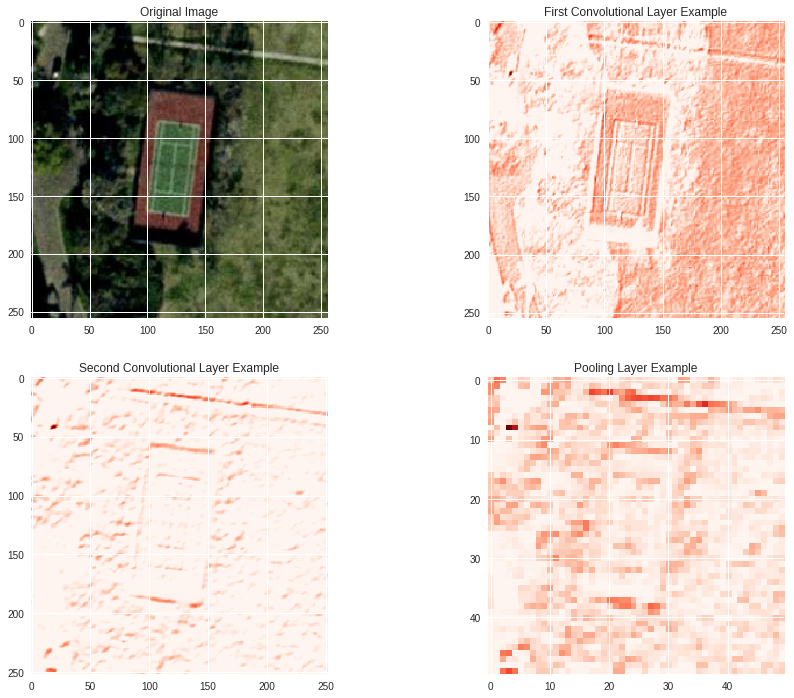

In [0]:
# plot the image and then an example of a kernel in each layer is looking for
plt.figure(figsize = (15, 12))
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(imagearray)
plt.subplot(2, 2, 2)
plt.title('First Convolutional Layer Example')
plt.imshow(first_layer[0,:,:,0], cmap = 'Reds')
plt.subplot(2, 2, 3)
plt.title('Second Convolutional Layer Example')
plt.imshow(second_layer[0,:,:,0], cmap = 'Reds')
plt.subplot(2, 2, 4)
plt.title('Pooling Layer Example')
plt.imshow(pooling_layer[0,:,:,0], cmap = 'Reds')
plt.show()

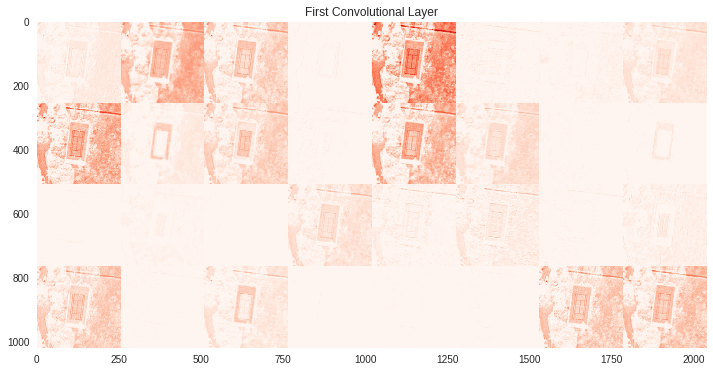

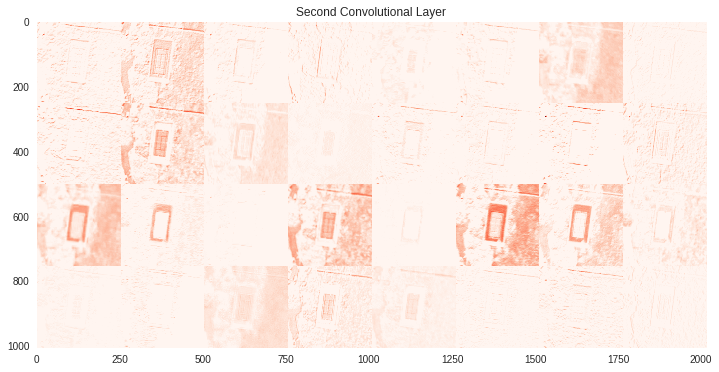

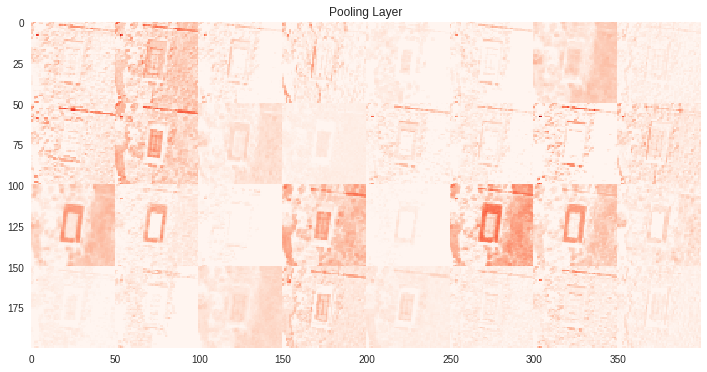

In [0]:
# look at the activation for every kernel
  # took most of this from Keegan's notebook
layer_names = ["First Convolutional Layer", "Second Convolutional Layer", "Pooling Layer"]
    
images_per_row = 8

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1.5 / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap = 'Reds')
    
# you can see that almost half the kernels go dead

In [0]:
# build collections of images that the model both gets correct and misses
  # initiate all the lists
images_we_got_right = []
labels_we_have_right = []
images_we_got_wrong = []
labels_we_have_wrong = []
# hoping to get one right and one wrong for every label
for l in labels:
  # get the image path
  f = os.listdir('./TestSet/'+l+'/')
  for z in range(20):
    img_path = './TestSet/'+l+'/'+f[z]
    # open and convert the images
    img = Image.open(img_path).convert('RGB')
    imagearray = np.asarray(img)
    # the images aren't consistently sized - this takes care of that
    to_fill = np.zeros((256, 256, 3))
    to_fill[:imagearray.shape[0],:imagearray.shape[1], :imagearray.shape[2]] = imagearray
    # get the predicted probability and label
    y_class_pred = np.argmax(model3.predict(np.expand_dims(to_fill, axis = 0)))
    predicted_label = labels[y_class_pred]
    # add the image to the list if it meets one of our criteria
    if predicted_label == l and l not in labels_we_have_right:
      images_we_got_right.append((to_fill, l, predicted_label))
      labels_we_have_right.append(l)
    elif l != predicted_label and l not in labels_we_have_wrong:
      images_we_got_wrong.append((to_fill, l, predicted_label))
      labels_we_have_wrong.append(l)
    else:
      continue


In [0]:
#find the parts of images that activate the classification decision of the CNN
  # taken with modificaiton from:
    # https://github.com/jacobgil/keras-cam/blob/master/cam.py
import cv2
from keras.models import *
from keras.callbacks import *
import keras.backend as K

# tells you what each layer outputs
def get_output_layer(model, layer_name):
    # 'layer' is just the name of the layer in the summary above
  layer_dict = dict([(layer.name, layer) for layer in model.layers])
  layer = layer_dict[layer_name]
  return layer

# this shows you which parts of the image light up the activation map
def visualize_class_activation_map(original_img, truth, pred, x, y, ind):
  # read in the image and size it appropriately
  #original_img = cv2.imread(img_path, 1)

  width, height, _ = original_img.shape
  img = np.expand_dims(original_img[:, :, :], axis = 0)
  # gets the probabilities associated with each class in the output layer
  class_weights = model3.layers[-1].get_weights()[0]
  # gets the output from the final convolutional layer
  final_conv_layer = get_output_layer(model3, "conv2d_2")
  # define a function that maps an input image to the output of the final convolutional layer and the class predictions vector
                          # taking an input image     # and defining what the output should be
  get_output = K.function([model3.layers[0].input], [final_conv_layer.output, model3.layers[-1].output])
  # call the funciton on the input image
  [conv_outputs, predictions] = get_output([img])
  # outputs of the final convolutional layer
  conv_outputs = conv_outputs[0, :, :, :]

  #Create the class activation map.
  cam = np.zeros(dtype = np.float32, shape = conv_outputs.shape[1:3])
  # this just builds the activation associated with each pixel in the image
  for i, w in enumerate(class_weights[0:251, 1]):
    cam += w * conv_outputs[i, :, :]
  # standardize the class activation map
  cam /= np.max(cam)
  cam = cv2.resize(cam, (height, width))
  # produce the heatmap to see which pixels are maximally activating
  heatmap = cv2.applyColorMap(np.uint8(255*cam), cv2.COLORMAP_AUTUMN)
  # turn down the level of the heatmap and overlay on the original image, then show the result
  img = heatmap*.5 + original_img
  # show it
  plt.subplot(x, y, ind)
  title_string = "Predicted: " + pred + ", Truth: " + truth
  plt.title(title_string)
  plt.grid(False)
  plt.axis("off")
  plt.imshow(img)
  plt.subplot(x, y, ind+1)
  plt.grid(False)
  plt.axis("off")
  plt.title('Original, Mutated Image')
  plt.imshow(original_img)

In [0]:
len(images_we_got_right)*2

22

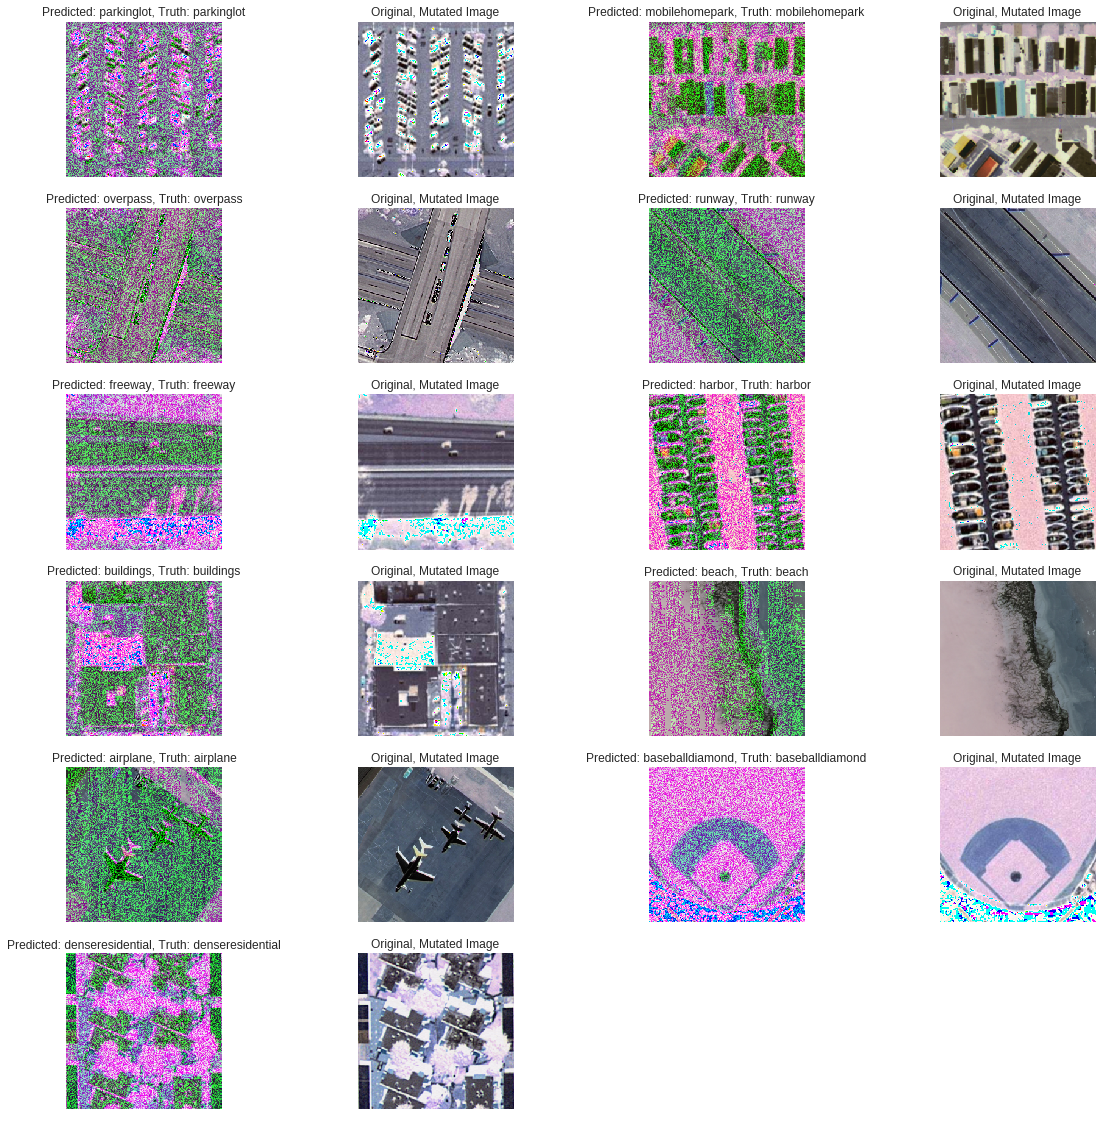

In [0]:
# make a class activation heatmap for images we got right
plt.figure(figsize=(20,20))
i=1
for imag in images_we_got_right:
  img, truth, pred = imag
  visualize_class_activation_map(img, truth, pred, 6, 4, i)
  i+=2

In [0]:
len(images_we_got_wrong)*2

38

In [0]:
# and one for some images we got wrong
plt.figure(figsize=(20,40))
i=1
for imag in images_we_got_wrong:
  img, truth, pred = imag
  visualize_class_activation_map(img, truth, pred, 10, 4, i)
  i+=2

## Visualizing Kernel Preferences

In [0]:
# code adapted from lecture notebooks
def process_image(tensor):
  tensor -= tensor.mean()
  tensor /= tensor.std() + 1e-5
  tensor *= 0.1
  
  tensor += 0.5
  tensor = np.clip(tensor, 0, 1)
  
  tensor *= 255
  x = np.clip(tensor, 0, 255).astype("uint8")
  return np.squeeze(x)

def create_kernel_pattern(model, 
                          layer_name="block3_conv1", 
                          kernel_num =2,
                          image_shape = (1, 256, 256, 3)):


  layer_output = model.get_layer(layer_name).output
  loss = K.mean(layer_output[:,:,:,kernel_num])
  
  grads = K.gradients(loss, model.input)[0]
  grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
  
  step = K.function([model.input], [loss, grads])
  loss_val, grads_val = step([np.zeros(image_shape)])
  
  input_img = np.random.random(image_shape) *20 + 128

  learning_rate = 1
  for i in range(500):
    loss_val, grads_val = step([input_img])
    input_img += grads_val * learning_rate
    
  return process_image(input_img)

In [0]:
layer_names = []
for layer in model3.layers[:4]:
    layer_names.append(layer.name) # names of the layers
layer_names

['conv2d_1', 'conv2d_2', 'max_pooling2d_1', 'dropout_1']

In [0]:
layer_output = model3.get_layer('conv2d_2').output
layer_output.shape

TensorShape([Dimension(None), Dimension(252), Dimension(252), Dimension(32)])

In [0]:
size = 256
margin = 5
x = 4
y = 8

image_grid = np.zeros((x*size + (x-1)*margin, y*size + (y-1)*margin, 3))

for l in layer_names[:3]:
  for i in range(x):
    for j in range(y):
      pattern = create_kernel_pattern(model3, l, kernel_num= i+ (j*x))

      hor_start = i * size + i* margin
      hor_end = hor_start + size
      vert_start = j*size + j*margin
      vert_end = vert_start + size

      image_grid[hor_start:hor_end, vert_start: vert_end, :] = pattern

  plt.figure(figsize=(20,20))
  plt.title(l)
  plt.imshow(image_grid)
  plt.grid(False)